In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pickle

2024-04-26 15:47:49.744664: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 15:47:49.748184: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 15:47:49.797051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 15:47:50.870354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

model2 = keras.Sequential()
model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(128, activation='sigmoid'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

loss, acc = model2.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model2.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))


(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-26 10:19:33.290517: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 10:19:33.293515: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to downlo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-04-26 10:19:33.770007: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.7009

2024-04-26 10:19:38.676188: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8055 - loss: 0.7006 - val_accuracy: 0.9424 - val_loss: 0.1933
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9438 - loss: 0.1863 - val_accuracy: 0.9496 - val_loss: 0.1553
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9607 - loss: 0.1290 - val_accuracy: 0.9685 - val_loss: 0.1073
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9725 - loss: 0.0902 - val_accuracy: 0.9698 - val_loss: 0.0933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9718 - val_loss: 0.0894
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0607 - val_accuracy: 0.9778 - val_loss: 0.0742
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0469 - val_accuracy: 0.9772 - val_loss: 0.0776
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9874 - loss: 0.0392 - val_accurac

2024-04-26 10:20:19.987815: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 - 1s - 738us/step - accuracy: 0.9913 - loss: 0.0270
Train accuracy: 99.13%


In [7]:

pickle_file = "models/model2.pkl"

# Save the model2 object to the pickle file
with open(pickle_file, "wb") as f:
    pickle.dump(model2, f)


In [13]:
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
import io
import PIL.Image
import PIL.ImageOps
import numpy as np

In [10]:
with open(pickle_file, "rb") as f:
    model = pickle.load(f)

app = FastAPI()
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [3]:


def load_model(path: str) -> Sequential:
    with open(path, "rb") as f:
        model = pickle.load(f)
    return model




In [4]:
def predict_digit(model: Sequential, data_point: list) -> str:
    import numpy as np
    
    # Reshape the data_point to match the input shape of the model
    data_point = np.array(data_point).reshape(1, 784)
    
    # Normalize the data_point
    data_point = data_point.astype('float32') / 255
    
    # Predict the digit using the model
    prediction = model.predict(data_point)
    
    # Get the predicted digit as a string
    predicted_digit = str(np.argmax(prediction))
    
    return predicted_digit


In [5]:
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
import io
import PIL.Image
import PIL.ImageOps
import numpy as np

app = FastAPI()
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    pil_image = Image.open(io.BytesIO(contents)).convert("L")
    pil_image = PIL.ImageOps.invert(pil_image)
    pil_image = pil_image.resize((28, 28), PIL.Image.ANTIALIAS)
    image_array = np.array(pil_image).reshape(1, -1)
    digit = predict_digit(model, image_array.tolist())

    return {"digit": digit}


In [24]:
@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    pil_image = Image.open(io.BytesIO(contents)).convert("L")
    pil_image = PIL.ImageOps.invert(pil_image)
    pil_image = pil_image.resize((28, 28), PIL.Image.ANTIALIAS)
    image_array = np.array(pil_image).reshape(1, -1)
    predictions = model.predict(image_array)

    return {"prediction": predictions.argmax()}


In [27]:
import uvicorn

In [28]:
if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

RuntimeError: asyncio.run() cannot be called from a running event loop

In [6]:
model= load_model("models/model2.pkl")

2024-04-26 15:48:31.284519: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-04-26 15:48:31.284577: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: HP
2024-04-26 15:48:31.284587: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: HP
2024-04-26 15:48:31.284758: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-04-26 15:48:31.284788: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.171.4
2024-04-26 15:48:31.284798: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.171.4


In [77]:
def conv(image):
    image = image.convert("L")
    image = 255 - np.array(image)
    image = np.array(image)
    padded_image = np.pad(image, ((1, 1), (8, 8)), mode='constant', constant_values=0)
    print(padded_image.shape)
    new_array = []

    for i in range(28):
        row = []
        for j in range(28):
            row.append(np.mean(padded_image[7*i:7*i+7, 7*j:7*j+7]))
        new_array.append(row)
    new_array = np.array(new_array)
    # print(new_array, "///",mean_value)

    new_array = np.where(new_array > 40, 255, 0)  # Convert values to either 0 or 255
    return new_array
    

(196, 196)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
prediction 9 [[2.3042284e-04 7.4090906e-10 1.1213549e-06 1.8539854e-06 1.8267274e-08
  1.6218765e-08 2.2316364e-11 5.9911348e-03 1.1252145e-08 9.9377537e-01]]
(196, 196)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
prediction 5 [[3.3490061e-10 5.3564541e-04 2.0432863e-06 4.4227972e-06 3.0718809e-05
  9.9754542e-01 1.8802842e-03 2.4978512e-08 1.5351803e-06 1.0511006e-08]]
(196, 196)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
prediction 7 [[2.0848448e-08 4.1615025e-05 1.1801099e-02 4.7165582e-07 1.5510668e-04
  8.9662416e-07 3.3925937e-06 9.8779106e-01 3.1756682e-07 2.0598780e-04]]
(196, 196)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
prediction 7 [[9.7786397e-05 5.1375724e-07 1.0179052e-04 7.5666304e-03 5.6151716e-08
  2.8346247e-07 6.4805661e-11 9.8972392e-01 2.1792296e-08 2.5088992e-03]]
(196, 196)
1/1 ━

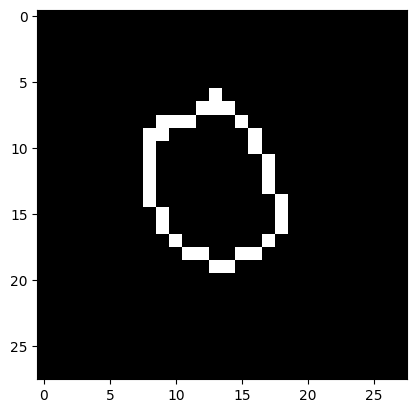

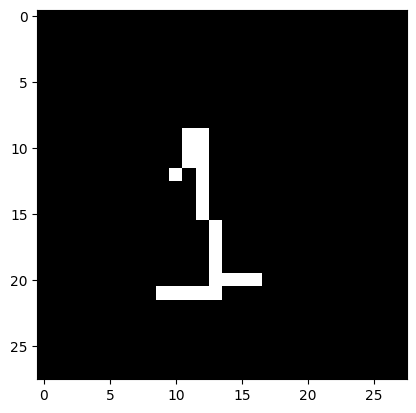

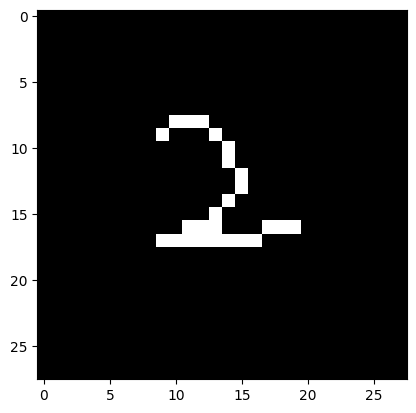

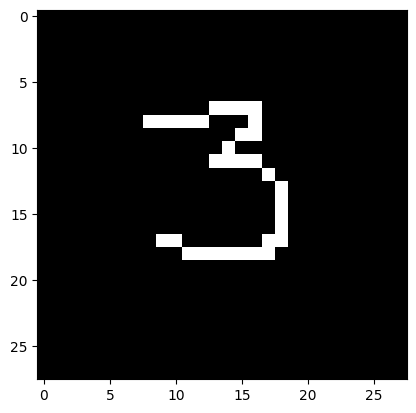

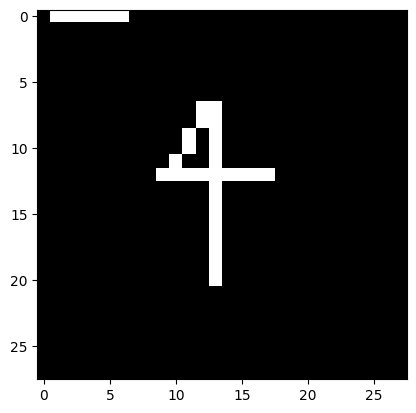

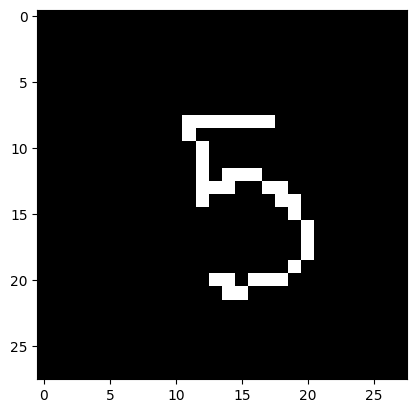

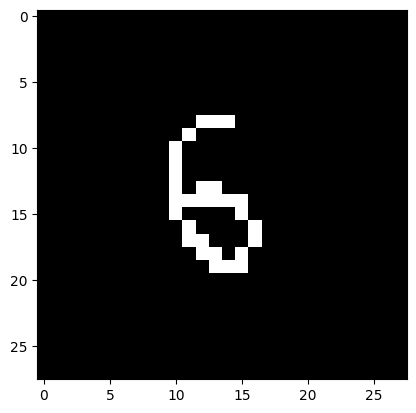

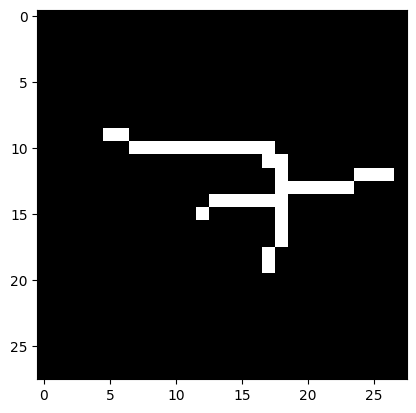

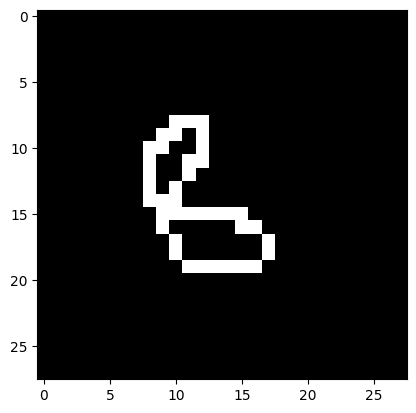

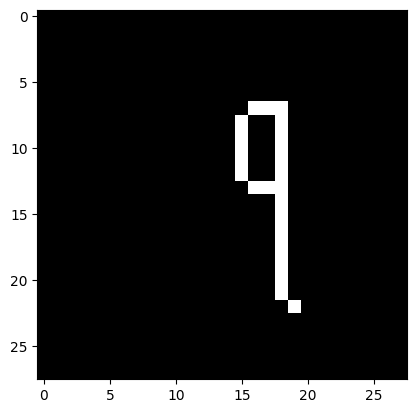

In [85]:
from PIL import Image
for i in range(10):
    image_path = f"data/images_test/{i}.png"
    image = Image.open(image_path)
    image = conv(image)
    plt.figure()
    plt.imshow(image, cmap='gray')
    print("prediction" ,np.argmax(model.predict(np.array(image).reshape(1, 784))), model.predict(np.array(image).reshape(1, 784)))

In [34]:
image

28.0

In [22]:
grayscale_image = image.convert("L")
np.array(grayscale_image).shape

(194, 180)

In [40]:
model = load_model("models/model2.pkl")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


0

In [44]:
l = [   255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      251,
      255,
      255,
      255,
      252,
      255,
      255,
      253,
      255,
      255,
      255,
      250,
      253,
      255,
      255,
      250,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      247,
      243,
      251,
      255,
      255,
      250,
      254,
      255,
      253,
      250,
      250,
      254,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      248,
      255,
      255,
      250,
      255,
      255,
      253,
      255,
      248,
      251,
      255,
      255,
      255,
      251,
      251,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      244,
      255,
      255,
      255,
      255,
      251,
      249,
      255,
      254,
      253,
      255,
      255,
      255,
      253,
      254,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      254,
      246,
      245,
      254,
      255,
      253,
      253,
      255,
      254,
      248,
      248,
      250,
      251,
      252,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      253,
      255,
      252,
      254,
      255,
      255,
      255,
      255,
      255,
      255,
      251,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      237,
      241,
      227,
      174,
      159,
      174,
      167,
      164,
      172,
      174,
      174,
      194,
      230,
      254,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      243,
      173,
      130,
      83,
      9,
      0,
      14,
      0,
      9,
      11,
      0,
      0,
      35,
      123,
      205,
      245,
      255,
      255,
      255,
      255,
      255,
      247,
      255,
      255,
      243,
      255,
      255,
      171,
      94,
      19,
      4,
      0,
      5,
      0,
      6,
      9,
      0,
      18,
      5,
      8,
      0,
      20,
      43,
      200,
      255,
      255,
      244,
      249,
      255,
      255,
      254,
      250,
      253,
      255,
      236,
      134,
      0,
      11,
      5,
      5,
      22,
      13,
      0,
      0,
      24,
      3,
      0,
      4,
      21,
      0,
      3,
      170,
      239,
      252,
      255,
      255,
      244,
      255,
      255,
      247,
      255,
      255,
      140,
      5,
      8,
      25,
      0,
      44,
      36,
      43,
      52,
      76,
      251,
      242,
      255,
      250,
      196,
      17,
      3,
      178,
      255,
      255,
      255,
      252,
      255,
      251,
      253,
      255,
      248,
      189,
      22,
      2,
      0,
      0,
      49,
      255,
      253,
      249,
      255,
      255,
      255,
      247,
      255,
      249,
      224,
      60,
      2,
      113,
      231,
      241,
      252,
      252,
      255,
      251,
      253,
      253,
      251,
      225,
      10,
      0,
      14,
      4,
      55,
      255,
      252,
      250,
      255,
      255,
      244,
      246,
      255,
      255,
      255,
      165,
      20,
      0,
      228,
      255,
      252,
      255,
      244,
      255,
      255,
      250,
      255,
      213,
      15,
      0,
      113,
      160,
      173,
      249,
      255,
      255,
      249,
      251,
      254,
      255,
      255,
      246,
      246,
      225,
      90,
      17,
      196,
      255,
      255,
      255,
      255,
      249,
      255,
      255,
      247,
      39,
      0,
      120,
      241,
      255,
      255,
      250,
      255,
      255,
      251,
      255,
      252,
      248,
      255,
      255,
      255,
      255,
      116,
      0,
      52,
      236,
      246,
      255,
      255,
      254,
      251,
      255,
      252,
      0,
      32,
      144,
      255,
      232,
      255,
      255,
      255,
      245,
      255,
      255,
      255,
      243,
      255,
      255,
      253,
      233,
      113,
      5,
      8,
      252,
      255,
      254,
      255,
      252,
      255,
      255,
      255,
      0,
      107,
      242,
      252,
      255,
      255,
      247,
      255,
      255,
      253,
      255,
      255,
      253,
      250,
      255,
      158,
      106,
      20,
      0,
      87,
      238,
      255,
      255,
      249,
      255,
      252,
      246,
      252,
      15,
      28,
      203,
      255,
      249,
      250,
      254,
      255,
      255,
      241,
      255,
      255,
      255,
      151,
      127,
      10,
      14,
      0,
      11,
      195,
      255,
      255,
      245,
      255,
      255,
      255,
      255,
      255,
      0,
      1,
      50,
      203,
      236,
      255,
      255,
      255,
      226,
      139,
      82,
      83,
      66,
      47,
      16,
      0,
      0,
      10,
      112,
      251,
      255,
      242,
      253,
      246,
      246,
      255,
      255,
      228,
      13,
      5,
      5,
      31,
      48,
      54,
      32,
      41,
      55,
      21,
      0,
      3,
      26,
      2,
      8,
      3,
      1,
      126,
      232,
      247,
      246,
      242,
      255,
      255,
      254,
      248,
      255,
      255,
      216,
      3,
      0,
      14,
      1,
      1,
      0,
      4,
      0,
      0,
      5,
      0,
      4,
      0,
      32,
      73,
      255,
      255,
      253,
      255,
      253,
      254,
      255,
      239,
      246,
      255,
      255,
      243,
      234,
      78,
      51,
      0,
      0,
      14,
      6,
      11,
      19,
      8,
      17,
      101,
      86,
      95,
      245,
      244,
      247,
      248,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      254,
      252,
      254,
      246,
      255,
      197,
      141,
      143,
      92,
      2,
      2,
      83,
      131,
      150,
      252,
      241,
      255,
      248,
      254,
      255,
      255,
      254,
      250,
      249,
      253,
      254,
      244,
      255,
      255,
      250,
      255,
      255,
      251,
      255,
      248,
      255,
      238,
      175,
      177,
      232,
      251,
      255,
      246,
      255,
      252,
      251,
      255,
      255,
      248,
      255,
      255,
      255,
      255,
      250,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255,
      255]

In [45]:
len(l)

784

In [49]:
l = np.array(l).reshape(28, 28)

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

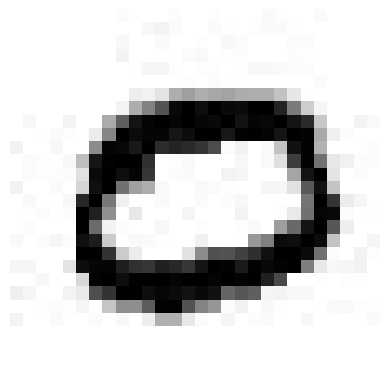

In [50]:
import matplotlib.pyplot as plt

plt.imshow(l, cmap='gray')
plt.axis('off')
plt.show()
